<a href="https://colab.research.google.com/github/aayushparikh22/Water-quality-analysis/blob/main/DL_AAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.960000,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
#Check for missing data.
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
df = df.dropna()
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
fig = px.scatter_3d(df,
                    x='Hardness',
                    y='Sulfate',
                    z='Chloramines',
                    color='Potability')
fig.show();

In [ ]:
fig = px.scatter_3d(df,
                    x='ph',
                    y='Solids',
                    z='Conductivity',
                    color='Potability')
fig.show();

In [ ]:
dataset = df.values
X = dataset[:,0:9]
y = dataset[:,9]

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.58734916, 0.57774671, 0.38629788, ..., 0.65452157, 0.79502934,
        0.63011476],
       [0.64365393, 0.44130034, 0.31438058, ..., 0.37724796, 0.20291434,
        0.52035803],
       [0.38893354, 0.47087564, 0.50612238, ..., 0.24992171, 0.40148717,
        0.21997295],
       ...,
       [0.81782618, 0.08743355, 0.65638906, ..., 0.56326524, 0.28574454,
        0.5786739 ],
       [0.42418706, 0.4640915 , 0.45965606, ..., 0.39778032, 0.44915584,
        0.44000443],
       [0.32242529, 0.49289123, 0.84140928, ..., 0.47142165, 0.50345848,
        0.59186714]])

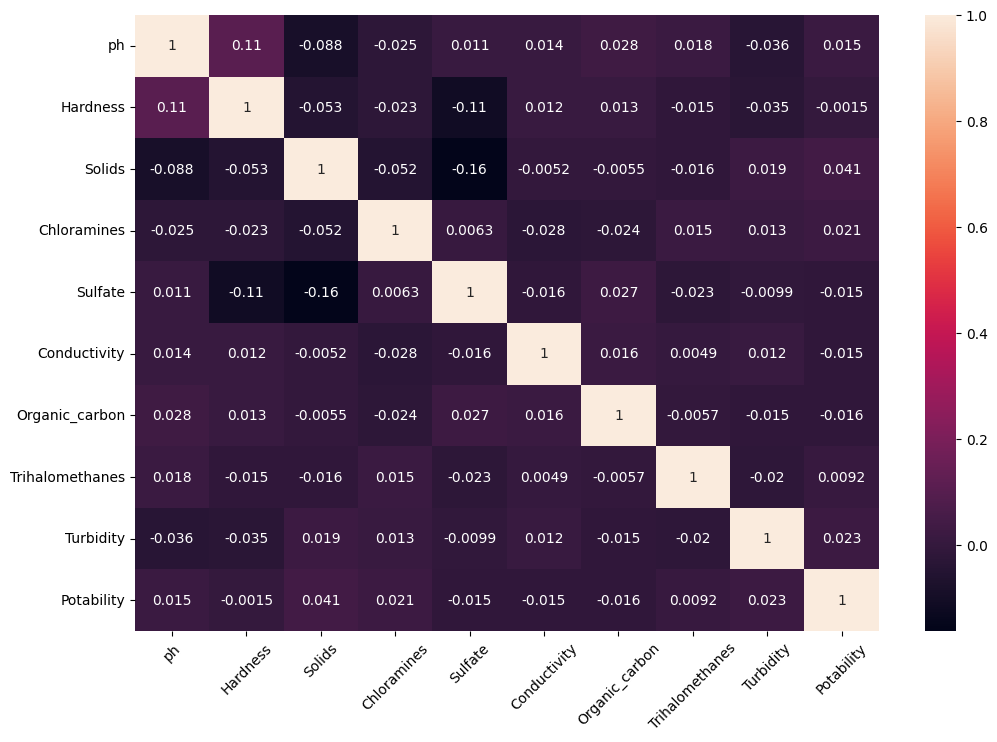

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=45);

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)
Y_train = Y_train.astype(np.float32)
Y_test = Y_test.astype(np.float32)

In [ ]:
# Build neural network model with a sequential model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential([
Dense(32, activation='relu', input_shape=(9,)),
Dense(64, activation='relu'),
Dropout(0.5),
Dense(32, activation='relu'),
Dense(1, activation='sigmoid'),])

In [ ]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=500,
                    validation_data=(X_test, Y_test), verbose=2)

Epoch 1/500
44/44 - 2s - loss: 0.6961 - accuracy: 0.5032 - val_loss: 0.6892 - val_accuracy: 0.5613 - 2s/epoch - 34ms/step
Epoch 2/500
44/44 - 0s - loss: 0.6806 - accuracy: 0.5899 - val_loss: 0.6853 - val_accuracy: 0.5629 - 173ms/epoch - 4ms/step
Epoch 3/500
44/44 - 0s - loss: 0.6727 - accuracy: 0.6127 - val_loss: 0.6852 - val_accuracy: 0.5629 - 148ms/epoch - 3ms/step
Epoch 4/500
44/44 - 0s - loss: 0.6733 - accuracy: 0.6098 - val_loss: 0.6860 - val_accuracy: 0.5629 - 156ms/epoch - 4ms/step
Epoch 5/500
44/44 - 0s - loss: 0.6697 - accuracy: 0.6112 - val_loss: 0.6866 - val_accuracy: 0.5629 - 114ms/epoch - 3ms/step
Epoch 6/500
44/44 - 0s - loss: 0.6679 - accuracy: 0.6119 - val_loss: 0.6877 - val_accuracy: 0.5629 - 129ms/epoch - 3ms/step
Epoch 7/500
44/44 - 0s - loss: 0.6711 - accuracy: 0.6112 - val_loss: 0.6880 - val_accuracy: 0.5629 - 149ms/epoch - 3ms/step
Epoch 8/500
44/44 - 0s - loss: 0.6698 - accuracy: 0.6112 - val_loss: 0.6883 - val_accuracy: 0.5629 - 115ms/epoch - 3ms/step
Epoch 9/50

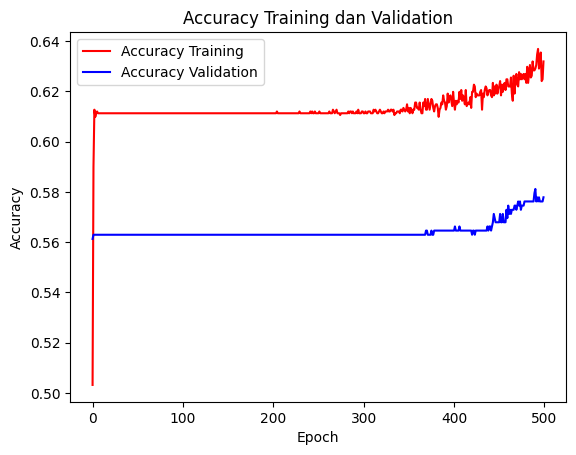

In [ ]:
# Plotting training accuracy and validation accuracy while comparing them
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], 'r', label='Accuracy Training')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy Validation')
plt.title('Accuracy Training dan Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.show()

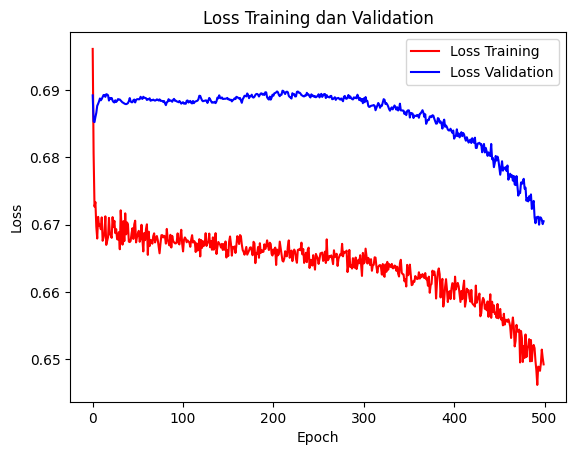

In [ ]:
# Plotting training loss and validation loss while comparing them
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'r', label='Loss Training')
plt.plot(history.history['val_loss'], 'b', label='Loss Validation')
plt.title('Loss Training dan Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.show()

In [ ]:
y_test = Y_test
y_train = Y_train
X_test_scaled = X_test
X_train_scaled =X_train

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,f1_score,accuracy_score,roc_auc_score,recall_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV


In [ ]:
DT_model = DecisionTreeClassifier(random_state=42)
DT_model.fit(X_train, Y_train)
y_pred = DT_model.predict(X_test)
y_train_pred = DT_model.predict(X_train)



print(confusion_matrix(Y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(Y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")


[[211 129]
 [123 141]]
--------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.63      0.62      0.63       340
         1.0       0.52      0.53      0.53       264

    accuracy                           0.58       604
   macro avg       0.58      0.58      0.58       604
weighted avg       0.58      0.58      0.58       604

--------------------------------------------------------


In [ ]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, 3, 5, 7],
              "max_depth": [None, 4, 5, 6, 7, 8, 9, 10],
              "min_samples_leaf": [2, 3, 5],
              "min_samples_split": [2, 3, 5, 7, 9, 15]}

In [ ]:
DT_grid_model = DecisionTreeClassifier(class_weight = "balanced", random_state=42)

DT_grid_model = GridSearchCV(estimator=DT_grid_model,
                            param_grid=param_grid,
                            scoring='recall',
                            n_jobs = -1, verbose = 0).fit(X_train, Y_train)

In [ ]:
from termcolor import colored
print(colored('\033[1mBest Parameters of GridSearchCV for DT Model:\033[0m', 'blue'), colored(DT_grid_model.best_params_, 'cyan'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for DT Model:\033[0m', 'blue'), colored(DT_grid_model.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for DT Model: {'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for DT Model: DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_features=5,
                       min_samples_leaf=2, min_samples_split=5,
                       random_state=42)


In [ ]:
DT_grid_model.fit(X_train, Y_train)
y_pred = DT_grid_model.predict(X_test)

y_train_pred = DT_grid_model.predict(X_train)

dt_grid_f1 = f1_score(y_test, y_pred)
dt_grid_acc = accuracy_score(y_test, y_pred)
dt_grid_recall = recall_score(y_test, y_pred)
dt_grid_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

[[146 194]
 [ 84 180]]
--------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.63      0.43      0.51       340
         1.0       0.48      0.68      0.56       264

    accuracy                           0.54       604
   macro avg       0.56      0.56      0.54       604
weighted avg       0.57      0.54      0.54       604

--------------------------------------------------------


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF1_model = RandomForestClassifier(random_state=42)
RF1_model.fit(X_train_scaled, y_train)
y_pred = RF1_model.predict(X_test_scaled)

y_train_pred = RF1_model.predict(X_train_scaled)

rf1_f1 = f1_score(y_test, y_pred)
rf1_acc = accuracy_score(y_test, y_pred)
rf1_recall = recall_score(y_test, y_pred)
rf1_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

[[301  39]
 [167  97]]
--------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.64      0.89      0.75       340
         1.0       0.71      0.37      0.49       264

    accuracy                           0.66       604
   macro avg       0.68      0.63      0.62       604
weighted avg       0.67      0.66      0.63       604

--------------------------------------------------------


In [ ]:
param_grid = {'n_estimators':[50, 100, 300],
             'max_features':[2, 3, 4],
             'max_depth':[3, 5, 7, 9],
             'min_samples_split':[2, 5, 8]}

In [ ]:
RF_grid_model = RandomForestClassifier(class_weight = "balanced", random_state=42)

RF_grid_model = GridSearchCV(estimator=RF_grid_model,
                             param_grid=param_grid,
                             scoring = "recall",
                             n_jobs = -1, verbose = 0).fit(X_train_scaled, y_train)

In [ ]:
print(colored('\033[1mBest Parameters of GridSearchCV for RF Model:\033[0m', 'blue'), colored(RF_grid_model.best_params_, 'cyan'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for RF Model:\033[0m', 'blue'), colored(RF_grid_model.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for RF Model: {'max_depth': 5, 'max_features': 4, 'min_samples_split': 8, 'n_estimators': 50}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for RF Model: RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=4,
                       min_samples_split=8, n_estimators=50, random_state=42)


In [ ]:
y_pred = RF_grid_model.predict(X_test_scaled)
y_train_pred = RF_grid_model.predict(X_train_scaled)

rf_grid_f1 = f1_score(y_test, y_pred)
rf_grid_acc = accuracy_score(y_test, y_pred)
rf_grid_recall = recall_score(y_test, y_pred)
rf_grid_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

[[276  64]
 [135 129]]
--------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.67      0.81      0.74       340
         1.0       0.67      0.49      0.56       264

    accuracy                           0.67       604
   macro avg       0.67      0.65      0.65       604
weighted avg       0.67      0.67      0.66       604

--------------------------------------------------------


In [ ]:
from xgboost import XGBClassifier
XGB_model1 = XGBClassifier(random_state=42)
XGB_model1.fit(X_train, y_train)
y_pred = XGB_model1.predict(X_test)
y_train_pred = XGB_model1.predict(X_train)

xgb1_f1 = f1_score(y_test, y_pred)
xgb1_acc = accuracy_score(y_test, y_pred)
xgb1_recall = recall_score(y_test, y_pred)
xgb1_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

[[274  66]
 [150 114]]
--------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.65      0.81      0.72       340
         1.0       0.63      0.43      0.51       264

    accuracy                           0.64       604
   macro avg       0.64      0.62      0.62       604
weighted avg       0.64      0.64      0.63       604

--------------------------------------------------------


In [ ]:
param_grid = {"n_estimators":[100, 300],
              "max_depth":[3,5,6],
              "learning_rate": [0.1, 0.3],
              "subsample":[0.5, 1],
              "colsample_bytree":[0.5, 1]}

In [ ]:
XGB_grid_model = XGBClassifier(random_state=42)
XGB_grid_model = GridSearchCV(XGB_grid_model, param_grid, scoring = "f1", verbose=0, n_jobs = -1)
XGB_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 1],
                         'learning_rate': [0.1, 0.3], 'max_depth': [3, 5, 6],
                         'n_estimators': [100, 300], 'subsample': [0.5, 1]},
             scoring='f1')

In [ ]:
print(colored('\033[1mBest Parameters of GridSearchCV for XGB Model:\033[0m', 'blue'), colored(XGB_grid_model.best_params_, 'cyan'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for XGB Model:\033[0m', 'blue'), colored(XGB_grid_model.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for XGB Model: {'colsample_bytree': 1, 'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for XGB Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,


In [ ]:
y_pred = XGB_grid_model.predict(X_test_scaled)
y_train_pred = XGB_grid_model.predict(X_train_scaled)

xgb_grid_f1 = f1_score(y_test, y_pred)
xgb_grid_acc = accuracy_score(y_test, y_pred)
xgb_grid_recall = recall_score(y_test, y_pred)
xgb_grid_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

[[266  74]
 [160 104]]
--------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.62      0.78      0.69       340
         1.0       0.58      0.39      0.47       264

    accuracy                           0.61       604
   macro avg       0.60      0.59      0.58       604
weighted avg       0.61      0.61      0.60       604

--------------------------------------------------------


In [ ]:
print("Thank You")

Thank You
